In [1]:
import datetime

import nfl_data_py as nfl
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance

In [ ]:
train_data = nfl.import_pbp_data(range(1999, 2021), cache=True)
test_data = nfl.import_pbp_data([2022], cache=True)
validation_data = nfl.import_pbp_data([2023], cache=True)

print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")
print(f"Validation dataset shape: {validation_data.shape}")

In [3]:
train_data = train_data[train_data["play_type"].isin(["run", "pass"])]
test_data = test_data[test_data["play_type"].isin(["run", "pass"])]
validation_data = validation_data[validation_data["play_type"].isin(["run", "pass"])]

print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")
print(f"Validation dataset shape: {validation_data.shape}")

Train dataset shape: (732766, 390)
Test dataset shape: (35430, 390)
Validation dataset shape: (35600, 390)


In [4]:
train_data["play_type"] = LabelEncoder().fit_transform(train_data["play_type"])
test_data["play_type"] = LabelEncoder().fit_transform(test_data["play_type"])
validation_data["play_type"] = LabelEncoder().fit_transform(
    validation_data["play_type"]
)

In [5]:
columns = [
    "drive",
    "qtr",
    "quarter_seconds_remaining",
    "down",
    "ydstogo",
    "yardline_100",
    # "shotgun",
    # "no_huddle",
    "score_differential",
    "spread_line",
    "season",
]

clf = XGBClassifier()
clf.fit(train_data[columns].values, train_data["play_type"])
test_preds = clf.predict(test_data[columns].values)
accuracy = accuracy_score(test_data["play_type"], test_preds)
accuracy

0.6937341236240474

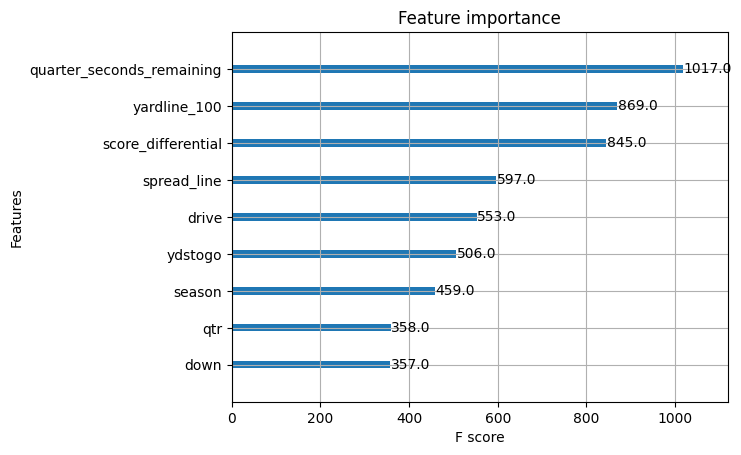

In [6]:
clf.get_booster().feature_names = columns

plot_importance(clf)
plt.show()

In [7]:
models_directory = "../models"

version = 2
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"{models_directory}/xgboost_v{version}_{timestamp}_{accuracy:.4f}.json"

clf.save_model(filename)